#### Imports 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math
import sklearn
import string
import random
from django.utils.crypto import get_random_string
from sklearn import datasets
import time
import seaborn as sns
plt.style.use('bmh')
plt.rcParams["image.cmap"] = "winter"

#### ---------------------------------------------------------------------------------------------------------------------------------

# Exercise 1

Implement your own hash functions by scratch, no ready-made hash functions are allowed, you have to code them by hand. Read the class material and search the internet. The hash function will have to convert the string containing the password to a (potentially large) number.

Our hash function takes in input the string and a prime number (between 0 and 128)
This hash function avoids equal hash codes for anagrams because uses the position of the letters in the string
The prime numbers are chosen in a uniform way in the set of prime numbers between [0,128]

In [5]:
#Set bloom filter dimension
m=18*10**9

#set prime numbers

prime_numbers=[2,3,5,7,11,13,17,19,23,
29,31,37,41,43,47,53,59,61,67
,71,73,79,83,89,97,101,103,107,109
,113,127]

In [ ]:
b= np.zeros((m),dtype=bool)

In [3]:
def hash_f(s,p):
    A=0
    for i in range(len(s)):
        A=A+ord(s[i])*(p**i)
    return A%m

We decided to use an array of 18 billions of lenght and 3 hash function 
For this reason the prime number are chosen in 9-step intervals from 127 to mantain uniformity

In [1]:
#creation of a list with the first 1000 passwords to check uniformity
with open("passwords1.txt", "r") as myfile:
    list_of_passwords = [next(myfile) for x in range(1000)]

In [6]:
vals=[]
for s in list_of_passwords: 
    vals.append(hash_f(s,127))
    vals.append(hash_f(s,79))
    vals.append(hash_f(s,41))

(array([318., 278., 305., 311., 298., 311., 286., 305., 299., 289.]),
 array([5.09508200e+06, 1.80331724e+09, 3.60153939e+09, 5.39976155e+09,
        7.19798371e+09, 8.99620586e+09, 1.07944280e+10, 1.25926502e+10,
        1.43908723e+10, 1.61890945e+10, 1.79873166e+10]),
 <a list of 10 Patch objects>)

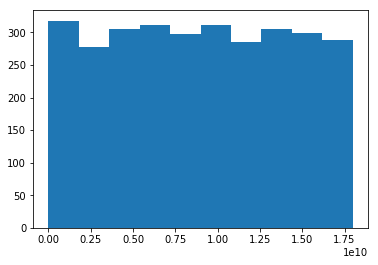

In [9]:
#Plot distribution of first 1000 password with 4 hash functions
plt.hist(vals)

 Bloom filter implementations

In [2]:
passwords1=open("passwords1.txt", "r")
passwords2=open("passwords2.txt","r")

In [ ]:
def BloomFilter(passwords1, passwords2):
    start = time.time()
    
    #This step fills the bloom filter
    for pw in passwords1:
        b[hash_f(s,127)]=True
        b[hash_f(s,79)]=True
        b[hash_f(s,41)]=True
        
    #Find hits between passwords 2 and passwords 1 
    count=0
    for pw in passwords2:
        if(bf[hash_f(pw,127)]==1 and bf[hash_f(pw,13)]==1 and bf[hash_f(pw,57)]==1):
            count+=1
    
    end = time.time()
    
    return count

In [ ]:
count=BloomFilter(passwords1, passwords2)

In [ ]:
print('Number of hash function used: ', 3)
print('Number of duplicates detected: ', count)
print('Probability of false positives: ', 0.000004515)
print('Execution time: ', end-start)

Bonus part: can you provide exactly how many false positive do you have?

To verify how many passwords of passwords2 are in passwords1 we implemented a function wich check for every password in passoword2 if it is in password1 (using in of Python) 

In [1]:
def count_how_many(password1,password2):
    how_many=0
    for pw in password2:
        if pw in password1:
            how_many+=1
    print('The number of passowords in passwords2 which are also in passowords1 is: ',how_many)

In [4]:
count_how_many(passwords1,passwords2)

The number of passowords in passwords2 which are also in passowords1 is:  14000000


After checking the real duplicates number we can say that the number of false positive are 20.
We are very close to the real result. 

#### ---------------------------------------------------------------------------------------------------------------------------------

# Exercise 2

##### Counting sort is a sorting algorithm that sorts the elements of an array by counting the number of occurrences of each unique element in the array. The count is stored in an auxiliary array and the sorting is done by mapping the count as an index of the auxiliary array.
By watching this video you can understand how does the counting sort actualy works:
    https://www.youtube.com/watch?v=TTnvXY82dtM

Importing all the libraries we need in the counting, alphabetic and word sort:

In [ ]:
import numpy as np
import time
import string
import random
import pandas as pd
from django.utils.crypto import get_random_string
import matplotlib.pyplot as plt

We have generated random numbers as input and sorted them with counting sort:

In [ ]:
inp = []
from random import randrange
for i in range(20):
    inp.append(randrange(1000))
print("input is : ", inp) # printing the random input

# geting the maximum value of the list and add 1 to it to create the frequency list and use the indexes
mx = max(inp)
m = mx+1 

# generating the frequency list
count = np.zeros(m,dtype=int) # making a zeros list with numpy
for num in inp:
    count[num] += 1 # adding 1 if the number exist and is equal to index of zeros list
    
sortedpos = []
for i in range(len(count)):
    # if the value in the zeros list is not zero add the index of that value to the new list as many time as the value
    if count[i] != 0:
        for j in range(count[i]):
            sortedpos.append(i)
print("sorted is : ", sortedpos)

##### Result : now we can see the numbers are sorted.

# Alphabetic and Word Sort

##### Here we have the a problem in alphabet and word sort (about lower and uppercase alphabets in each word), because we are using the ascii codes the counting sort will first sort the uppercase alphabet and then lowercase ones (ABCabc), so we have to change all the alphabet to lower case to become able to sort them in a right way (AaBbCc), but in the result we had to show the alphabet as they were in input (not all in lowercase), so here is the solution:

We add a column to the the matrix of the words (which has ascii codes in) and put the order (initial index) of each word in it. Then we change all the characters to lowercase and convert them to ascii codes. Each time we sort them (in the way we will explain later) the input changes. It means that the order of the words in input will become like what the sorting function tell it to be. So we don't have to convert the ascii codes to character again! we just show the words with right order.


###### Sorting:

##### The idea is to sort the words based on the first character, so if the character does have any duplicate we will create a sublist for those duplicated characters resort the corresponding words based on the second character and it will continue till there is no duplicate left or the algorithm reaches the last character.

For example: [Melika, manika, Dario, santiago, marco] for this case we first have the initial list of [m, m, d, s, m] and then we have the sublists of [m, m, m] , [d], [s] and we will move to the next character of those words related to the sublists that have duplicated characters in:
 

                                        m.               e
                                        m.     -->       a.     -->     n
                                        m.               a.             r 
                                        d
                                        s

We have generated a list with length of 'm' that contains random words with maximum len of 'n' as input,for generating alphabet (for second part of quesstion) it is just enough to put n = 2.
then we convert them to numbers(ascii code of them) to become able to sort them with counting sort:

In [ ]:
inp = []
for m in range(10):
    # returns a securely generated random string.
    n = 8
    # generating random words
    inp.append(get_random_string(length = np.random.randint(1,n) , allowed_chars = (string.ascii_letters+" ")))
print("input is : ", inp) # printing the random input

In [ ]:
#using the counting sort to sort the alphabet and words, it works exactly like the counting sort above
def countingsort(sortedAlphabet):
    sortedAlphabet = list(sortedAlphabet)
    # geting the maximum value of the list of ascii codes of alphabet and add 1 to it to create the frequency list and use the indexes
    mx = max(sortedAlphabet)
    m = mx+1
    order = [] # creating a list add the index of each number to it
    # generating the frequency list
    count = np.zeros(m,dtype=int) # making a zeros list with numpy
    for num in sortedAlphabet:
        count[num] += 1 # adding 1 if the number exist and is equal to index of zeros list

    Alsortedpos = []
    for i in range(len(count)):
        # if the value in the zeros list is not zero add the index of that value to the new list as many time as the value
        if count[i] != 0:
            for j in range(count[i]):
                Alsortedpos.append(i) # it adds the index of that value to the new list
                # to be able to sort the words with their indexes we have to save them in a list
                order.append(sortedAlphabet.index(i)) # it adds the index of each number to order
                sortedAlphabet[sortedAlphabet.index(i)] = -1 # to avoid adding the same index in the next iteration
    return Alsortedpos, order

In [ ]:
wordsascii = []
for word in inp:
    # generating the matrix that have each word's character's ascii codes in it
    max_len = max(map(len,inp)) + 1 # number of its columns should be the length of biggest word + 1 because of the order we added to the end of it 
    ordinals = np.zeros((len(inp), max_len), dtype = int)
    # for each word we convert the characters to ascii codes and put them in seprated rows
    cc = 0
    for word in inp:
        word = word.lower() #converting all the alphabet in each word to lowercase so we can sort in an apropriate way
        ordinal = [ord(c) for c in word] #converting each character in each word to ascii code
        ordinals[cc,0:len(ordinal)] = ordinal #put them in seprated rows
        cc += 1
    ordinals[:,-1] = range(len(inp)) # to keep the row positions of the words while swapping through the counting sort
#print(ordinals)

In [ ]:
# this function checks the values and looks for duplicates and make sublists
def sublist(sorted_arr,index):
    s_list = []
    l_list = [index[0]]
    for i in range(1,len(sorted_arr)):
        # to add the index of the value that has been duplicated to create sublist
        if sorted_arr[i] == sorted_arr[i-1]:
            l_list.append(index[i])
        else:
            # if there exist more than one duplicate we have to keep the indexes in another list 
            if len(l_list) > 1:
                s_list.append(l_list)
            l_list = [index[i]]
    if len(l_list) > 1:
        s_list.append(l_list)
    return s_list

In [ ]:
# in this part we are making the sublists
not_sorted_sublists = list([list(range(ordinals.shape[0]))]) # making the initial problem (the rows that still need to be sorted) that is sorting all the values in the first column
for i in range(ordinals.shape[1]-1): # for range number of columns -1 because the last column contains the row positions
    new_sublist = [] # to store the subproblems for the next column 
    for l in not_sorted_sublists:
        sorted_arr, order = countingsort(ordinals[l,i]) #sorting those values related to the unsolved problem (the row that still need to be sorted)
        ordinals[l,:] = ordinals[l,:][order,:] # reordering those rows in unsolved problem (the row that still need to be sorted). we are done with this problem
        newest_sublist = sublist(sorted_arr, l) # generating new problems (the rows that still need to be sorted) if there exist duplicated values in sorted array
        new_sublist = new_sublist + newest_sublist # each time addig the new ordered sublist to last ordered ones
    not_sorted_sublists = new_sublist # replace new unsolved problems (the rows that still need to be sorted) with solved ones
print("output is : ",[inp[i] for i in list(ordinals[:,-1])])

##### Result: Now we can see all the alphabets or words sorted

Our step now has been studying time complexity of this code. 

Every algorithm implemented here is based on Counting sort which has a O(n) complexity. 
So, for alphabet sort we have the simplest case of our algorithm (that is valid for alphabet sort and word sort) 

The alphabet sort can be traduced in a normal counting sort cause every letter is a numeric value. 

Now for the word sort as the simplest case we have a linear cost. The simplest case is when we have all the word starting with different letters: 

For example: 

['home', 'beer', 'dog', 'table]

In this case the counting sort will be applied only on:

['h', 'b', 'd', 't']

So we will discover that the order of our words list is: 

['beer', 'dog', 'home', 'table']

But in the worst case we will have all words having same letters except for the last one

['coal', 'coax', 'coat']

In this case the algorithm will compare n times m words so Counting sort will be computed m times (where m is number of words in the list and n is the max lenght of words in the list. In the example case every word has the same lenght). 
So we have O(mn) time complexity. 


##### Now we want to show the time complexity of our code by using graphs:

In [ ]:
# Discussing time complexity empirically
times = []
for i in range(50,500,50):
    inp = []
    for j in range(i):
        inp.append(get_random_string(length = np.random.randint(1,100) , allowed_chars = (string.ascii_letters+" ")))

    start_time = time.time()
    def countingsort(sortedAlphabet):
        sortedAlphabet = list(sortedAlphabet)
        mx = max(sortedAlphabet)
        m = mx+1
        order = list()
        count = np.zeros(m,dtype=int)
        for num in sortedAlphabet:
            count[num] += 1
        Alsortedpos = []
        for i in range(len(count)):
            if count[i] != 0:
                for j in range(count[i]):
                    Alsortedpos.append(i)
                    order.append(sortedAlphabet.index(i))
                    sortedAlphabet[order[-1]] = -1
        return Alsortedpos, order
    wordsascii = []
    for word in inp:
        max_len = max(map(len,inp)) + 1
        ordinals = np.zeros((len(inp), max_len), dtype = int)
        cc = 0
        for word in inp:
            word = word.lower()
            ordinal = [ord(c) for c in word]
            ordinals[cc,0:len(ordinal)] = ordinal
            cc += 1
        ordinals[:,-1] = range(len(inp))

    sublist_ = list([list(range(ordinals.shape[0]))])
    for i in range(ordinals.shape[1]-1):
        new_sublist = list()
        for l in sublist_:
            sorted_arr, order = countingsort(ordinals[l,i])
            ordinals[l,:] = ordinals[l,:][order,:]
            index = list(range(len(sorted_arr)))
            sublist_l = sublist(sorted_arr, l)
            new_sublist = new_sublist + sublist_l
        sublist_ = new_sublist
    [inp[i] for i in list(ordinals[:,-1])]
    times.append(time.time()-start_time)
#making plot 
plt.scatter(x = range(50,500,50), y = times)
plt.xlabel('lenght of list')
plt.ylabel('time(s)')
plt.grid()

In the case showed in the graph we have time growing with lenght list.

This shows a linear behaviour: 

Time grows with size list growing 

#### ---------------------------------------------------------------------------------------------------------------------------------

# Exercise 3

#### Defining few functions needed for the algorithm

In [ ]:
# given 2 vectors this function returns their euclidean distance
def dist (x, m):
    diff = 0
    # loop on all the components of the vectors, in this case our data is in a dataframe, so the lenght of one point is
    # len(df.columns)
    for i in range(len(df.columns)):
        # do the difference between the i-th components and square it
        diff += (x[i]-m[i])**2  
    return (math.sqrt(diff))

In [ ]:
# evaluate the center of mass given a cluster c
def com (c):
    xcm = []
    # if the cluster doesn't have points in it we generate its center randomly again
    ''''
    Re-generate the center random if the cluster is of length zero it's a choice we made at the 
    beginning. Then we decided to leave the center as it is. The last option is implemented in 
    the function k_means. We left anyways the first option in this function even if it is never 
    satisfied.
    '''
    
    if len(c) == 0:
        for i in range(len(df.columns)):
            xcm.append(np.random.uniform(low = mins[i], high = maxs[i]))
    else:
        # if the cluster is not empty we evaluate its center of mass
        for i in range(len(df.columns)):
            # for every component we calculate the center of mass on all points of the cluster
            xcm.append(sum([row[i] for row in c])/len(c))
    return xcm

In [ ]:
# cost function
def cost_function (centers, clusters):
    cost = 0
    # it is the sum of all distances squared between all centers and the respective 
    # cluster elements for all clusters
    for i in range(k):
        for j in range(len(clusters['cluster_{}'.format(i)])):
            cost += dist(centers[i], clusters['cluster_{0}'.format(i)][j])**2
    return cost

In [ ]:
# function to generate initial centroids
def centroids ():
    centers = []
    for i in range(k):
        row = []
        # loop on all components 
        for i in range(len(df.columns)):
            row.append(np.random.uniform(low = mins[i], high = maxs[i]))
        # at the end we append the center in the centers list
        centers.append(row)
    return centers

In [ ]:
# transform data from the dictionary to a dataframe
def dicto_df (clusters):
    clusters_df = {}
    for i in range(len(df.columns)):
        clusters_df[df.columns[i]] = []
    clusters_df['cluster'] = []
    # fill the dictionary taking into account also the cluster's tag
    for i in range(k):
        cl = clusters['cluster_{}'.format(i)]
        for j in range(len(cl)):
            for l in range(len(df.columns)):
                clusters_df[df.columns[l]].append(cl[j][l])
            clusters_df['cluster'].append(i+1)
    # transform into a dataframe
    return pd.DataFrame(clusters_df)

# go back from standardized data to oridinal form
def std_or(clusters_df, centers):
    for i in range(0,len(clusters_df.columns)-1):
        clusters_df.iloc[:, i] = clusters_df.iloc[:,i]*summary.iloc[2,i] + summary.iloc[1,i]
    for i in range(len(centers)):
        for j in range(len(centers[i])):
            centers[i][j] = centers[i][j]*summary.iloc[2,j] + summary.iloc[1,j]
    return (clusters_df, centers)

In [ ]:
# function for plotting 2 data features from the final dataframe
# it takes as arguments the number of the 2 columns
def scatterplot_clust (col1, col2):
    x_c = []
    y_c = []
    for x in centers:
        x_c.append(x[col1])
        y_c.append(x[col2])
    plt.scatter(clusters_df.iloc[:,col1], clusters_df.iloc[:,col2], c = clusters_df['cluster'],
               s = 15)
    plt.scatter(x_c, y_c, c = 'black', marker = 'D')
    #plt.grid(color = 'white', linestyle = '--')
    plt.xlabel(clusters_df.columns[col1])
    plt.ylabel(clusters_df.columns[col2])

def clust_his (col):
    #sns.set(color_codes=True)
    for i in range(k):
        sns.distplot(clusters_df.iloc[:,col][clusters_df['cluster'] == i+1]);

#### Data 

Here we import the data and standardize them. After applying the k-means algorithm the data are rescaled back to their original units using the function str_or().

In [ ]:
# data import 
df = pd.read_csv('wine.data', names = ['Cult', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium', 'Total Phenols', 
                            'Flavonoids', 'Nonflavonoid Phenols', 'Proanthocyanins', 'Color Intensity','Hue', '% of Diluted wines','Proline' ])
# for now we dont need this
tags = df['Cult']
del df['Cult']

In [ ]:
# take the summary of the dataframe
summary = df.describe()

In [ ]:
# standardize the data
for i in range(len(df.columns)):
    df.iloc[:, i] = (df.iloc[:,i] - summary.iloc[1,i])/summary.iloc[2,i]

In [ ]:
# dataset explanation
with open('wine.names', 'r') as f:
    explanation = f.read()

In [ ]:
''' 
Find max and min of each features, each element i of the 2 lists corresponts to the max and min 
element of the i-th column. This is neede to generate the centroids as explained in the next section.
'''
maxs = []
mins = []
for i in range(len(df.columns)):
    maxs.append(max(df.iloc[:,i]))
    mins.append(min(df.iloc[:,i]))

#### k - means

Fixed the numbers of clusters k we want to generate k random centers of the clusters. Each component of the center is bounded between the max and the min value of that feature. The number is generated from an uniform distribution. This last choice was made to optimize a little bit the algorithm, and to avoid bad initializations as shown in the 4-th question. \
For each center it is calculated the distance between each point of the dataset and the center, then that element is associated to the center of the cluster for which the distance is minimum. After having associated all points to the clusters we get the new centers of clusters as their center of masses.

Number of clusters k is a global variable since it is used in almost every function. In k-means function the first argument is a boolean one, where 'True' is for generate centroids, 'False' if for not generate centroids. If the second option is  passed then it is possible to pass as second argument a matrix with the centroids. Basically the algorithm does 100 iterations, but it stops when the cost function, in the last 3 iterations, has not changed of a 1/10000 of its last value.

In [ ]:
def k_means (cent_onoff, cent):
    
    centers = cent
    # if the passed variable is True then the initial centroids are generated, otherwise they are passed
    if cent_onoff == True:
        centers = centroids()
    # define the list that will contain the cost at each iteration
    cost = []
    # the algorithm will do a maximum of 100 iterations
    for m in range(100):
        # defining the clusters dictionary, it contains k values, associated with the k clusters
        # each value is associated with a list that contains the points of that cluster        
        clusters = {}
        for i in range(k):
            clusters['cluster_{}'.format(i)] = []

        # loop on all points of our dataset
        for i in range(len(df)):
            # distXM[i] contains, for one point of the dataset x, the distance between it and the center i 
            distXM = []
            x = list(df.loc[i])
            # calculate the distance between x and all the centers
            for i in range(k):
                distXM.append(dist(centers[i], x))
            # put that point to the cluster for which the distance with its center is minimum
            for i in range(k):
                if min(distXM) == distXM[i]:
                    clusters['cluster_{}'.format(i)].append(x)
         
        # get the new centers of the clusters as their center of masses 
        for i in range(len(centers)):
            # if the cluster does not have points, then its center does not change
            if len(clusters['cluster_{}'.format(i)]) == 0:
                centers[i] = centers[i]
            else:
                # if it contains points we evaluate the center of mass
                centers[i] = com(clusters['cluster_{}'.format(i)])
        # after having evaluated the centers we calculate the cost function        
        cost.append(cost_function(centers, clusters))  
        # early stopping
        if len(cost) > 3:
            # when the absolute value of the difference between the last 3 elements is minor than
            # a 1/10000 the algorithm stops
            if (abs(cost[-1]-cost[-2]) < cost[-1]/10000) & (abs(cost[-2]-cost[-3]) < cost[-1]/10000):
                print('Converged in ',m,' iterations')
                return (clusters, centers, cost)
            
        if m == 99:
            print('The algorithm  did not converge in 100 iterations.')
            return (clusters, centers, cost)

#### Comparison between our kmeans and the sklearn one

We set the data in the format that is taken from sklearn, then set the same initial centroids for both algorithms.

In [ ]:
k = 3 # fix number of clusters at 3

# sklearn kmeans
import sklearn
from sklearn.cluster import KMeans
x = []
for i in range(len(df)):
    x.append(list(df.iloc[i]))
center_in = centroids()# generate initial centroids

clust = KMeans(n_clusters = k, init = np.array(center_in))
clust.fit(x)

In [ ]:
# our algorithm 
k = 3
# use the same centroids as before
clusters, centers, cost = k_means(False, center_in)
clusters_df = dicto_df(clusters)

In [ ]:
# get the centers from sklearn kmeans
x_c = []
y_c = []
for x in clust.cluster_centers_:
    x_c.append(x[6])
    y_c.append(x[9])
# comparison for 2 random features
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(x = df['Flavonoids'], y = df['Color Intensity'], c = clust.labels_, s = 15)
plt.scatter(x_c,y_c, c = 'black', marker = 'D')
plt.xlabel('Flavonoids')
plt.ylabel('Color Intensity')
plt.title('from scikit')

plt.subplot(1,2,2)
scatterplot_clust(6, 9)
plt.title('handmade')
plt.show()
# each color is a cluster

Setting the same initial centroids we get almost the same results. In this case data are still standardized, just to show the results of the 2 algorithms.

#### Cost function and number of clusters

We can plot the cost in function of the iteration

In [ ]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iteration')
plt.title('Cost function with k = {}'.format(k))

We can plot the cost for different values of k at a certain iteration. We execute the k-means for k from 1 to 10, then visualize it to choose the ideal value of k.

In [ ]:
cost_tot = []
for k in range(1,11):
    cost_tot.append(k_means(False, centroids())[2])

In [ ]:
# lets visualize the cost functions in function of k for different iteractions
fig = plt.figure()
n = np.arange(1, 11)
plt.plot(n,[row[-1] for row in cost_tot])
plt.xlabel('number of clusters k')
plt.ylabel('cost')
plt.title('k-means')
ax = fig.add_subplot(111)
ax.annotate('elbow', xy=(3, 1270),arrowprops=dict(facecolor='black', shrink=0.05), 
            xytext=(6, 1800),horizontalalignment='right', verticalalignment='top')
plt.xticks(np.arange(min(n), max(n)+1, 1.0))
plt.show()

According to the elbow method a good number of clusters is 3: it may represent the 3 different cultivars or 3 tipologies of wines, red, white and rosé, or even 3 types of wines like Chardonnay, Pinot,...

#### Case: k = 3

In [ ]:
k = 3
clusters, centers, cost = k_means(True, [])
clusters_df = dicto_df(clusters)

Let's start visualizing the data with PCA. We are going to use sklearn to reduce the data dimensions from 13 to 2.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
princomp = pca.fit_transform(clusters_df) 
pc_df = pd.DataFrame(data = princomp, columns = ['PC1', 'PC2'])
plt.figure(figsize=(8,6))
#plt.subplot(1,2,1)
plt.scatter(pc_df['PC1'], pc_df['PC2'], c = clusters_df['cluster'], s = 15 )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Data have a 'nice' subdivision, we may think that 3 clusters is a good choice. We can verify if the 3 clusters represent the 3 different cultivars.\
Since we have the cultivar tags, we can confront that subdivision with our clustering.

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
scatterplot_clust(6,9)
plt.title('Labels are clusters')
plt.subplot(1,2,2)
plt.scatter(df['Flavonoids'], df['Color Intensity'], c = tags, s = 15)
plt.xlabel('Flavonoids')
plt.ylabel('Color Intensity')
plt.title('Labels are cultivars')

__From the last result it is shown that, with high probability, the 3 clusters represent the 3 different cultivars.__

We can check now what is our accuracy

In [ ]:
cont = 0
for i in range(len(tags)):
    if tags[i] != clusters_df['cluster'][i]:
        cont += 1
print ('Accuracy ', round(1-cont/len(tags),2))

We can check some features of the 3 clusters from their distributions

In [ ]:
# go back to original scale
clusters_df, centers = std_or(clusters_df, centers)

In [ ]:
# each color is a cluster
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
clust_his (0)
plt.subplot(2,2,2)
clust_his(1)
plt.subplot(2,2,3)
clust_his (6)
plt.subplot(2,2,4)
clust_his(9)

In [ ]:
# scatter plot of 2 features for the 3 clusters, each color is a cluster
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
scatterplot_clust(6, 10)
plt.subplot(1,2,2)
scatterplot_clust(6,9)

#### ---------------------------------------------------------------------------------------------------------------------------------

# Exercise 4

From various k-means tests, for both handmade and sklearn algorithms, were found some centroids initial conditions that do not converge to the optimal solution. In our algorithm each component of the centroids were generated between the maximum and minimum value of the feature associated to that component, but breaking this condition the algorithm can converge to solutions that are far away from the optimal.

In the following case we are going to generate the centroids far away from all the other points, what will happen is that at the end there will be only 1 cluster, (associated to the nearest center of the 3 initial's), and the other 2 centers won't be associated to any other points. 

In [ ]:
# generating the centroids, but with the condition that each value must be 'far away' from the cluster points
k = 3
centers = []
for i in range(k):
    row = []
    # loop on all components 
    for i in range(len(df.columns)):
        row.append(np.random.uniform(low = 4*summary.iloc[2,i]*maxs[i], high = 5*summary.iloc[2,i]*maxs[i]))
    # at the end we append the center in the centers list
    centers.append(row)

In [ ]:
clusters, centers, cost = k_means(False, centers)
clusters_df = dicto_df(clusters)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(cost)
plt.ylabel('cost')
plt.subplot(1,2,2)
scatterplot_clust(6, 9)

As seen from above the cost is at 2300, meanwhile the optimal is at around 1300, and only 1 cluster contains all the points. The cost will be higher than the optimal even just generating one center  far away from the others, there will be only 2 clusters at the end, and the fartest center will not contain any points. \
\
In general there can be many other bad initializations. This algorithm finds a local minimum, so any initial condition that is close to the local minimum will not let the algorithm converge to the optimal solution. For example setting certains seeds we  can generate random centroids that won't let the algorithm converge to the optimal solution.


In [ ]:
# wrong initializations with seeds : 0, 5
np.random.seed(5)
k = 3
centers = centroids()
x_c = []
y_c = []
for x in clust.cluster_centers_:
    x_c.append(x[6])
    y_c.append(x[9])

clusters, centers, cost = k_means(False, centers)
clusters_df = dicto_df(clusters)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(cost)
plt.ylabel('cost')
plt.subplot(1,2,2)
scatterplot_clust(6, 9)
plt.scatter(x_c, y_c, c = 'red')

In the previous pictuers at the left we have the cost function, greater than the ideal 1300 cost, and on the right we have the final clustering. The red points represent the initial positions of the 'bad' centroids and the black points represent the centroids at which the algorithm converged. Probably the black ones represent a local minimum, and the red ones were 'too close' to those that they could not escape, like a ball trapped in a small hole (next figure).

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://miro.medium.com/max/984/1*7GQ5_OiJTVD7RmAj3ZlERA.png",width=500, height=300)